<a href="https://colab.research.google.com/github/netoquimico/Pythonworks/blob/main/Analise_credito_banco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [8]:
df_banco=pd.read_excel('/content/db banco.xlsx')

In [9]:
df_banco

,Safra,Estado,Renda Mensal,Endividamento,Quantidade de Cheques sem Fundo,Quantidade de Restritivos,Valor dos Restritivos,Quantidade de Protestos,Valor dos Protestos,Modelo Score 1,Modelo Score 2,Modelo Score 3,Modelo Score 4,Performance 30D3M EVER,Performance 60D6M EVER,Performance 60D9M EVER,Performance 90D9M EVER,Performance 90D12M EVER
0,2020-05-01 00:00:00 UTC,MS,1076,26 a 50%,0,2,418,0,0,141,236,196,405,BOM,MAU,MAU,MAU,MAU
1,2020-05-01 00:00:00 UTC,MG,12709,Até 25%,0,0,0,0,0,767,646,805,946,BOM,BOM,BOM,BOM,BOM
2,2020-06-01 00:00:00 UTC,MS,2518,Acima de 100%,0,4,32306,0,0,67,238,196,563,BOM,BOM,BOM,BOM,BOM
3,2020-05-01 00:00:00 UTC,RS,1090,Até 25%,0,0,0,0,0,245,523,290,698,MAU,BOM,MAU,BOM,MAU
4,2020-10-01 00:00:00 UTC,RJ,1155,Até 25%,0,0,0,0,0,697,718,645,816,BOM,BOM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020-07-01 00:00:00 UTC,MS,4281,Até 25%,0,0,0,0,0,574,614,418,761,MAU,MAU,MAU,MAU,NaN
9996,2020-07-01 00:00:00 UTC,MG,4274,Até 25%,0,2,352,0,0,126,213,243,531,BOM,BOM,BOM,BOM,NaN
9997,2020-05-01 00:00:00 UTC,RS,3365,Até 25%,0,0,0,0,0,627,649,491,655,BOM,BOM,BOM,BOM,BOM
9998,2020-06-01 00:00:00 UTC,SC,2393,Até 25%,0,0,0,0,0,605,658,740,892,BOM,BOM,BOM,BOM,BOM


**Label Encoder**

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()

In [12]:
df_banco['Estado'] = encoder.fit_transform(df_banco['Estado'])

In [14]:
df_banco['Endividamento'] = encoder.fit_transform(df_banco['Endividamento'])

In [18]:
df_banco['Safra'] = encoder.fit_transform(df_banco['Safra'])

In [16]:
df_banco['Performance 30D3M EVER'] = encoder.fit_transform(df_banco['Performance 30D3M EVER'])
df_banco['Performance 60D6M EVER'] = encoder.fit_transform(df_banco['Performance 60D6M EVER'])
df_banco['Performance 60D9M EVER'] = encoder.fit_transform(df_banco['Performance 60D9M EVER'])
df_banco['Performance 90D9M EVER'] = encoder.fit_transform(df_banco['Performance 90D9M EVER'])
df_banco['Performance 90D12M EVER'] = encoder.fit_transform(df_banco['Performance 90D12M EVER'])

In [29]:
df_banco['Estado'] = df_banco['Estado'].astype('category')
df_banco['Safra'] = df_banco['Safra'].astype('category')
df_banco['Endividamento'] = df_banco['Endividamento'].astype('category')


**Conversão colunas com valores inteiros para categóricos**

In [26]:
df_banco['Performance 30D3M EVER'] = df_banco['Performance 30D3M EVER'].astype('category')
df_banco['Performance 60D6M EVER'] = df_banco['Performance 60D6M EVER'].astype('category')
df_banco['Performance 60D9M EVER'] = df_banco['Performance 60D9M EVER'].astype('category')
df_banco['Performance 90D9M EVER'] = df_banco['Performance 90D9M EVER'].astype('category')
df_banco['Performance 90D12M EVER'] = df_banco['Performance 90D12M EVER'].astype('category')

**Valores NaN**

In [43]:
df_banco['Performance 60D9M EVER'] = df_banco['Performance 60D9M EVER'].replace(2, np.nan)
df_banco['Performance 90D9M EVER'] = df_banco['Performance 90D9M EVER'].replace(2, np.nan)
df_banco['Performance 90D12M EVER'] = df_banco['Performance 90D12M EVER'].replace(2, np.nan)

In [47]:
df_banco.sample(50)

,Safra,Estado,Renda Mensal,Endividamento,Quantidade de Cheques sem Fundo,Quantidade de Restritivos,Valor dos Restritivos,Quantidade de Protestos,Valor dos Protestos,Modelo Score 1,Modelo Score 2,Modelo Score 3,Modelo Score 4,Performance 30D3M EVER,Performance 60D6M EVER,Performance 60D9M EVER,Performance 90D9M EVER,Performance 90D12M EVER
9468,2,7,1093,3,0,3,4057,0,0,90,206,250,624,0,0,0,0,NaN
6427,3,7,1477,4,0,0,0,0,0,314,523,192,639,1,1,1,1,NaN
2080,0,5,3367,4,0,0,0,0,0,706,683,624,763,0,0,0,0,0
3075,1,3,2197,4,0,0,0,0,0,903,702,887,909,0,0,0,0,0
1711,2,7,1513,4,0,0,0,0,0,507,649,534,737,0,0,0,0,NaN
7614,2,8,3492,3,0,2,1036,0,0,2,219,188,621,0,0,0,0,NaN
2486,5,2,2352,4,0,0,0,0,0,919,700,800,911,0,0,NaN,NaN,NaN
4198,2,5,1390,4,0,0,0,0,0,433,633,408,604,0,0,0,0,NaN
8239,0,8,1118,3,0,6,3067,0,0,30,209,196,578,0,1,1,1,1
1330,5,1,1465,1,0,2,840,0,0,92,253,133,560,0,0,NaN,NaN,NaN


In [45]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Safra                            10000 non-null  category
 1   Estado                           10000 non-null  category
 2   Renda Mensal                     10000 non-null  int64   
 3   Endividamento                    10000 non-null  category
 4   Quantidade de Cheques sem Fundo  10000 non-null  int64   
 5   Quantidade de Restritivos        10000 non-null  int64   
 6   Valor dos Restritivos            10000 non-null  int64   
 7   Quantidade de Protestos          10000 non-null  int64   
 8   Valor dos Protestos              10000 non-null  int64   
 9   Modelo Score 1                   10000 non-null  int64   
 10  Modelo Score 2                   10000 non-null  int64   
 11  Modelo Score 3                   10000 non-null  int64   
 12  Model

**Valores Vazios**

In [46]:
df_banco.isnull().sum()

Safra                                 0
Estado                                0
Renda Mensal                          0
Endividamento                         0
Quantidade de Cheques sem Fundo       0
Quantidade de Restritivos             0
Valor dos Restritivos                 0
Quantidade de Protestos               0
Valor dos Protestos                   0
Modelo Score 1                        0
Modelo Score 2                        0
Modelo Score 3                        0
Modelo Score 4                        0
Performance 30D3M EVER                0
Performance 60D6M EVER                0
Performance 60D9M EVER             1665
Performance 90D9M EVER             1665
Performance 90D12M EVER            6646
dtype: int64

**Estatística**

In [48]:
df_banco.describe()

,Renda Mensal,Quantidade de Cheques sem Fundo,Quantidade de Restritivos,Valor dos Restritivos,Quantidade de Protestos,Valor dos Protestos,Modelo Score 1,Modelo Score 2,Modelo Score 3,Modelo Score 4
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2780.155700,0.164900,0.711100,1635.66340,0.152900,209.724300,459.182800,524.183800,483.280100,695.888500
std,1464.592111,1.564146,1.823285,10741.23154,1.173908,2700.805532,264.013507,200.494433,215.561897,115.237171
min,1041.000000,0.000000,-7.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,1404.000000,0.000000,0.000000,0.00000,0.000000,0.000000,216.000000,253.000000,277.000000,630.000000
50%,3365.000000,0.000000,0.000000,0.00000,0.000000,0.000000,481.000000,627.000000,482.000000,700.000000
75%,3492.000000,0.000000,1.000000,145.00000,0.000000,0.000000,672.250000,669.000000,669.000000,772.000000
max,33564.000000,64.000000,35.000000,462266.00000,37.000000,133742.000000,999.000000,811.000000,922.000000,999.000000


<ipython-input-50-08362599de8a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_banco.corr(), annot=True);


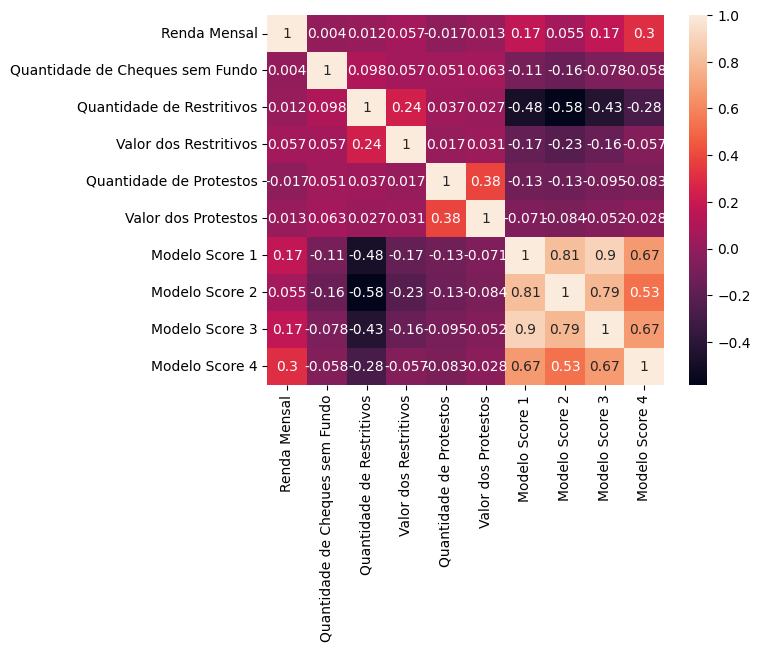

In [50]:
sns.heatmap(df_banco.corr(), annot=True);

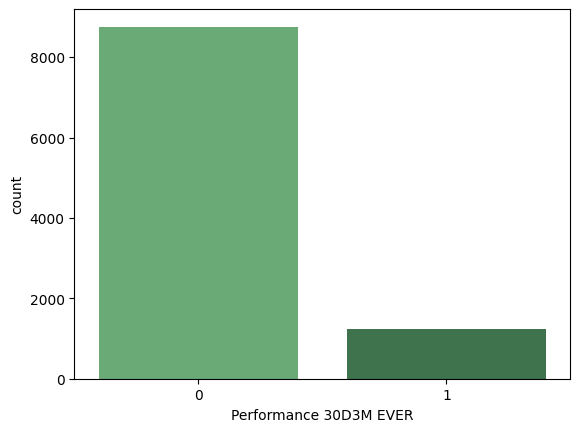

In [51]:
sns.countplot(x="Performance 30D3M EVER", data=df_banco, palette="Greens_d")

plt.show()

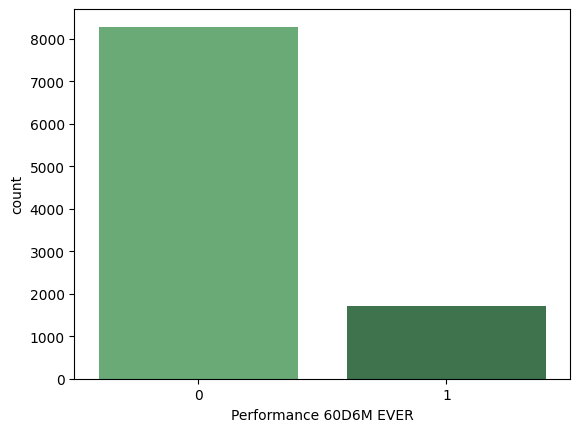

In [52]:
sns.countplot(x="Performance 60D6M EVER", data=df_banco, palette="Greens_d")

plt.show()

**Divisão entre classes e previsores**

In [53]:
X_banco=df_banco.iloc[:,0:13].values
Y_banco=df_banco.iloc[:,13].values

In [54]:
X_banco

array([[    0,     3,  1076, ...,   236,   196,   405],
       [    0,     2, 12709, ...,   646,   805,   946],
       [    1,     3,  2518, ...,   238,   196,   563],
       ...,
       [    0,     6,  3365, ...,   649,   491,   655],
       [    1,     7,  2393, ...,   658,   740,   892],
       [    5,     9,  1292, ...,   665,   548,   711]])

In [55]:
Y_banco

[0, 0, 0, 1, 0, ..., 1, 0, 0, 0, 0]
Length: 10000
Categories (2, int64): [0, 1]

**Padronização dos dados**

In [56]:
from sklearn import preprocessing

In [57]:
scaler = preprocessing.StandardScaler()
X_banco = scaler.fit_transform(X_banco)

In [58]:
X_banco

array([[-1.45521182, -0.51786409, -1.16362836, ..., -1.43743747,
        -1.33277017, -2.52438551],
       [-1.45521182, -0.87142734,  6.77959461, ...,  0.60760934,
         1.49254572,  2.17051498],
       [-0.87111781, -0.51786409, -0.17900466, ..., -1.42746163,
        -1.33277017, -1.15323158],
       ...,
       [-1.45521182,  0.54282566,  0.39934227, ...,  0.6225731 ,
         0.03581471, -0.35483815],
       [-0.87111781,  0.8963889 , -0.26435692, ...,  0.66746437,
         1.19099312,  1.70189275],
       [ 1.46525824,  1.6035154 , -1.01613965, ...,  0.70237981,
         0.30025314,  0.13114046]])

**Usando undersampling**

In [59]:
# Create a TomekLinks object
from imblearn.under_sampling import TomekLinks
tl=TomekLinks(sampling_strategy='majority')

In [60]:
# Fit and transform the dataset
X_resampled, Y_resampled = tl.fit_resample(X_banco, Y_banco)

In [61]:
from sklearn.model_selection import train_test_split

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_resampled, Y_resampled, test_size=0.3)

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
random_forest = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=1, criterion='entropy', random_state = 0)
random_forest.fit(X_train_under, y_train_under)

RandomForestClassifier(criterion='entropy', min_samples_split=5, random_state=0)

In [67]:
from sklearn.metrics import accuracy_score
previsoes=random_forest.predict(X_test_under)
accuracy_score(y_test_under, previsoes)

0.8657601115760112

**Árvore de decisão**

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
arvore_risco_banco = DecisionTreeClassifier(criterion='entropy',max_depth=5)
arvore_risco_banco.fit(X_train_under, y_train_under)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [128]:
arvore_risco_banco.feature_importances_

array([0.04533889, 0.        , 0.15532481, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.04470072,
       0.62807866, 0.0630479 , 0.06350902])

In [129]:
arvore_risco_banco.classes_

array([0, 1])

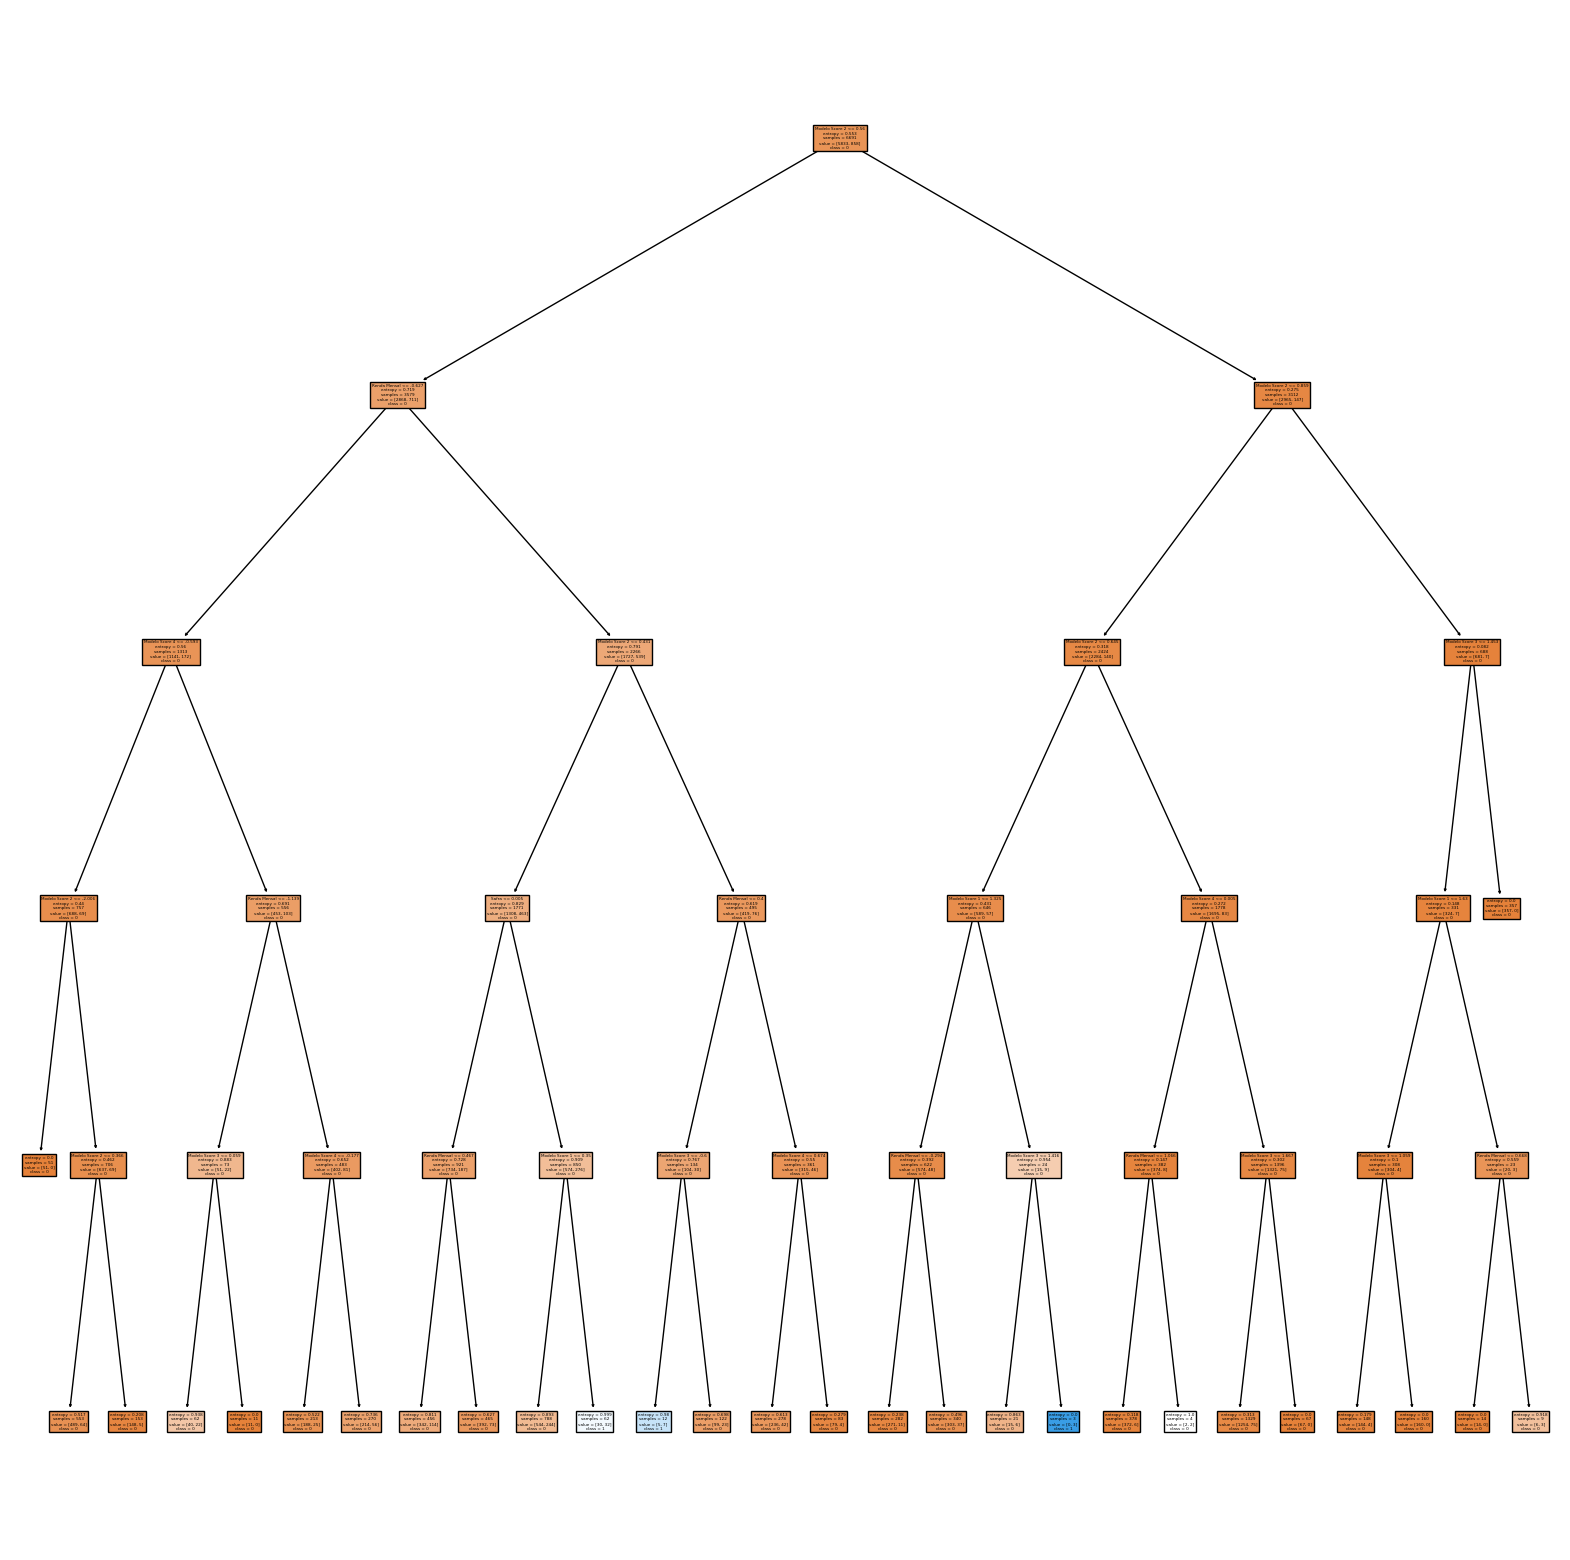

In [132]:
from sklearn import tree
previsores = ['Safra','Estado','Renda Mensal', 'Endividamento','Quantidade de Cheques sem Fundo','Quantidade de Restritivos', 'Valor dos Restritivos', 'Quantidade de Protestos', 'Valor dos Protestos','Modelo Score 1', 'Modelo Score 2', 'Modelo Score 3', 'Modelo Score 4']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
class_names_str = [str(cls) for cls in arvore_risco_banco.classes_]
tree.plot_tree(arvore_risco_banco, feature_names=previsores, class_names=class_names_str, filled=True, ax=eixos)
figura.savefig('arvore_credit.png')

**Usando oversampling**

In [68]:
from imblearn.over_sampling import SMOTE

In [69]:
smote=SMOTE(sampling_strategy='minority')

In [70]:
X_over,Y_over=smote.fit_resample(X_banco, Y_banco)

In [71]:
X_over.shape

(17512, 13)

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train_over, X_test_over, Y_train_over, Y_test_over = train_test_split(X_over, Y_over, test_size = 0.15, random_state = 0)

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
random_forest_census = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=1, criterion='entropy', random_state = 0)
random_forest_census.fit(X_train_over, Y_train_over)

RandomForestClassifier(criterion='entropy', min_samples_split=5, random_state=0)

In [76]:
from sklearn.metrics import accuracy_score, classification_report
previsoes=random_forest_census.predict(X_test_over)
accuracy_score(Y_test_over, previsoes)

0.9071183859916254

In [133]:
df_banco.to_csv('dados.csv', index=False)  # index=False evita que o índice seja salvo como coluna